# Exercises: Introduction to pandas
By Christopher van Hoecke, Maxwell Margenot

## Lecture Link : 
https://www.quantopian.com/lectures/introduction-to-pandas

### IMPORTANT NOTE: 
This lecture corresponds to the Introduction to Pandas lecture, which is part of the Quantopian lecture series. This homework expects you to rely heavily on the code presented in the corresponding lecture. Please copy and paste regularly from that lecture when starting to work on the problems, as trying to do them from scratch will likely be too difficult.

Part of the Quantopian Lecture Series:

* [www.quantopian.com/lectures](https://www.quantopian.com/lectures)
* [github.com/quantopian/research_public](https://github.com/quantopian/research_public)



----

In [22]:
# Useful Functions
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (13,9)

----

# Exercise 1
## a. Series 
Given an array of data, please create a pandas Series `s` with a datetime index starting `2016-01-01`. The index should be daily frequency and should be the same length as the data.

In [2]:
l = np.random.randint(1,100, size=1000)
s = pd.Series(l)

## Your code goes here
new_index = pd.date_range("2016-01-01", periods=len(s), freq="D")
s.index = new_index
print(s[0:10])

2016-01-01    94
2016-01-02    48
2016-01-03    88
2016-01-04    99
2016-01-05    15
2016-01-06    55
2016-01-07    87
2016-01-08    35
2016-01-09    36
2016-01-10    83
Freq: D, dtype: int32


## b. Accessing Series Elements.
- Print every other element of the first 50 elements of series `s`.
- Find the value associated with the index `2017-02-20`.

In [3]:
## Your code goes here
print(len(s[0:50:2]))
## Your code goes here
print(s[s.index == '2017-02-20'])

25
2017-02-20    20
Freq: D, dtype: int32


## c. Boolean Indexing.
In the series `s`, print all the values between 1 and 3.

In [4]:
## Your code goes here
print(s[(s>1) & (s<3)])

2016-01-28    2
2016-02-26    2
2016-02-27    2
2016-03-10    2
2016-11-06    2
2016-12-26    2
2017-01-24    2
2017-02-16    2
2017-09-18    2
2017-11-13    2
2018-04-29    2
dtype: int32


----

# Exercise 2 : Indexing and time series. 
### a. Display
Print the first and last 5 elements of the series `s`.

In [5]:
## Your code goes here
print(s[0:5])
## Your code goes here
print(s[-5:])

2016-01-01    94
2016-01-02    48
2016-01-03    88
2016-01-04    99
2016-01-05    15
Freq: D, dtype: int32
2018-09-22    88
2018-09-23    42
2018-09-24    77
2018-09-25    97
2018-09-26    75
Freq: D, dtype: int32


### b. Resampling
- Using the resample method, upsample the daily data to monthly frequency. Use the median method so that each monthly value is the median price of all the days in that month.
- Take the daily data and fill in every day, including weekends and holidays, using forward-fills. 

C:\Anaconda\lib\site-packages\ipykernel_launcher.py:14: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).median()
  


Date
2012-01-31    355.505005
2012-02-29    378.195007
2012-03-31    408.994995
2012-04-30    420.835007
2012-05-31    405.240005
2012-06-30    402.450012
2012-07-31    380.470001
2012-08-31    295.390015
2012-09-30    332.809998
2012-10-31    286.559998
Freq: M, Name: Adj Close, dtype: float64


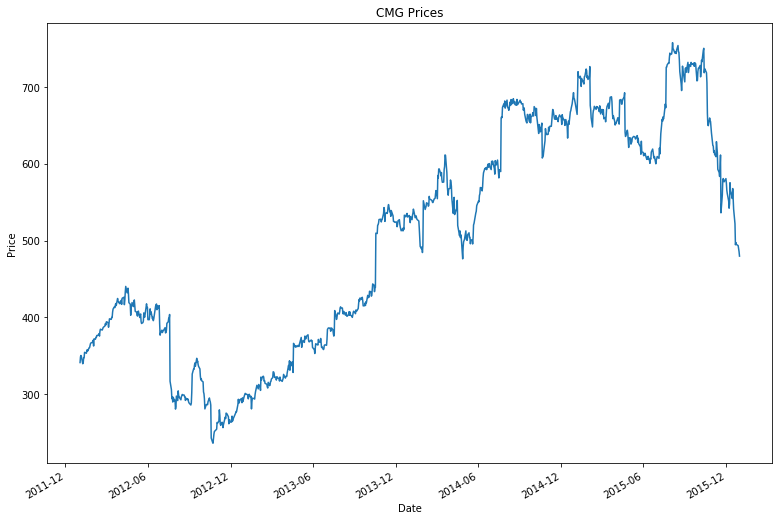

In [23]:
from pandas_datareader import data

symbol = "CMG"
start = "2012-01-01"
end = "2016-01-01"
prices = data.DataReader(symbol, 'yahoo', start, end)['Adj Close']

prices.plot();
plt.title(symbol + " Prices")
plt.ylabel("Price")
plt.xlabel("Date");

## Your code goes here
monthly_prices = prices.resample('M', how='median')
print(monthly_prices[0:10])

In [7]:
## Your code goes here
calendar_dates = pd.date_range(start=start, end=end, freq='D')
daily_filled = prices.reindex(calendar_dates, method='ffill')
print(daily_filled[0:10])

2012-01-01           NaN
2012-01-02           NaN
2012-01-03    341.269989
2012-01-04    348.750000
2012-01-05    350.480011
2012-01-06    348.950012
2012-01-07    348.950012
2012-01-08    348.950012
2012-01-09    339.739990
2012-01-10    341.119995
Freq: D, Name: Adj Close, dtype: float64


----

# Exercise 3 : Missing Data
- Replace all instances of `NaN` using the forward fill method. 
- Instead of filling, remove all instances of `NaN` from the data.

In [8]:
## Your code goes here
#done above

In [9]:
## Your code goes here
daily_no_nans = prices.reindex(calendar_dates).dropna()
print(daily_no_nans[0:10])

2012-01-03    341.269989
2012-01-04    348.750000
2012-01-05    350.480011
2012-01-06    348.950012
2012-01-09    339.739990
2012-01-10    341.119995
2012-01-11    347.600006
2012-01-12    347.619995
2012-01-13    354.619995
2012-01-17    353.380005
Name: Adj Close, dtype: float64


----

# Exercise 4 : Time Series Analysis with pandas
## a. General Information
Print the count, mean, standard deviation, minimum, 25th, 50th, and 75th percentiles, and the max of our series s. 

In [10]:
print("Summary Statistics")
## Your code goes here
print(s.describe())

Summary Statistics
count    1000.00000
mean       49.70900
std        28.30034
min         1.00000
25%        25.00000
50%        50.00000
75%        74.00000
max        99.00000
dtype: float64


## b. Series Operations
- Get the additive and multiplicative returns of this series. 
- Calculate the rolling mean with a 60 day window.
- Calculate the standard deviation with a 60 day window.

Date
2016-01-05    0.125000
2016-01-06   -0.394230
2016-01-07   -0.596155
2016-01-08   -0.432692
2016-01-11   -0.634615
2016-01-12    0.211538
2016-01-13    0.144230
2016-01-14   -0.576923
2016-01-15   -0.163462
2016-01-19    0.557693
Name: Open, dtype: float64
Date
2016-01-05    0.004255
2016-01-06   -0.013364
2016-01-07   -0.020482
2016-01-08   -0.015177
2016-01-11   -0.022603
2016-01-12    0.007708
2016-01-13    0.005216
2016-01-14   -0.020754
2016-01-15   -0.006005
2016-01-19    0.020611
Name: Open, dtype: float64


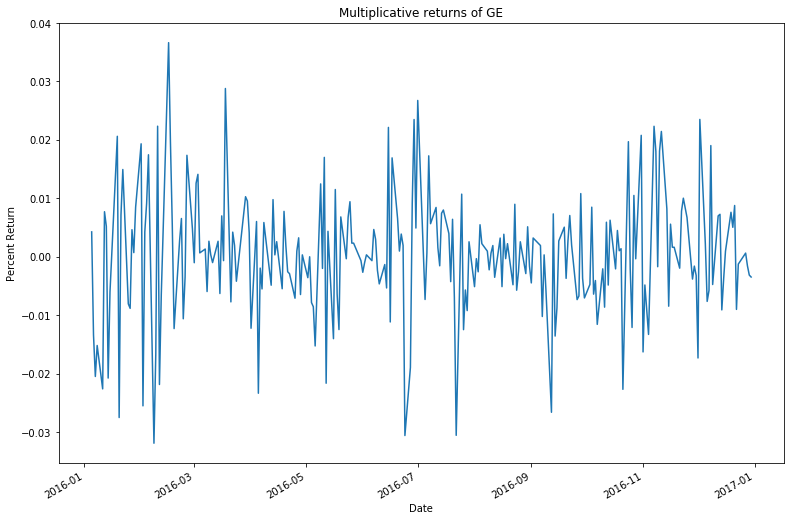

In [24]:
start = '2016-01-01'
end = '2017-01-01'
prices = data.DataReader('GE', 'yahoo', start, end)['Open']

## Your code goes here
add_returns = prices.diff()[1:]
print(add_returns[0:10])
## Your code goes here
mult_returns = prices.pct_change()[1:]
print(mult_returns[0:10])

plt.title("Multiplicative returns of GE")
plt.xlabel("Date")
plt.ylabel("Percent Return")
mult_returns.plot();

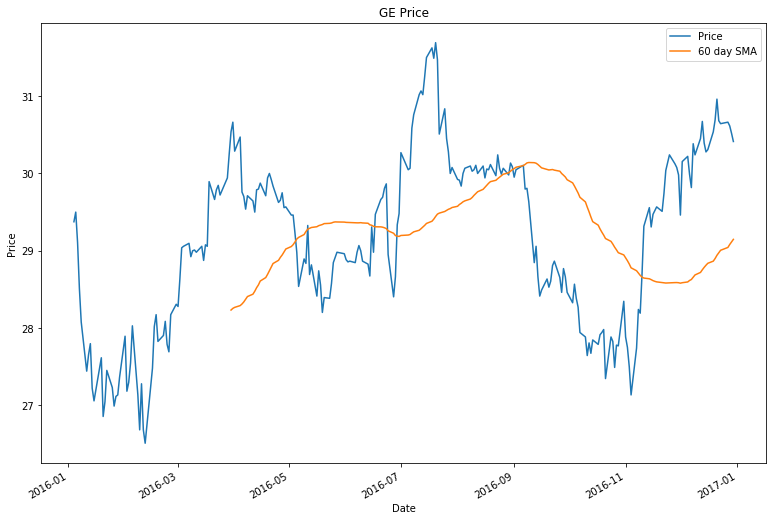

In [25]:
# Rolling mean

## Your code goes here
rolling_mean = prices.rolling(60).mean()
prices.plot()
rolling_mean.plot()
plt.title("GE Price")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend(['Price','60 day SMA']);

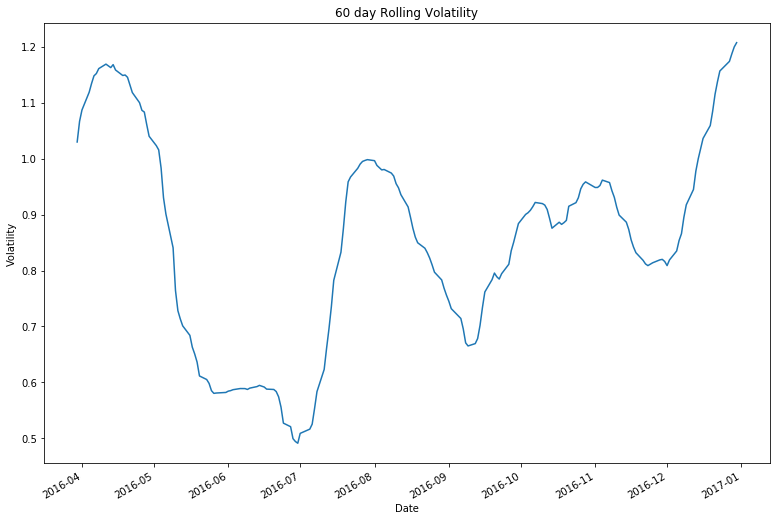

In [26]:
# Rolling Standard Deviation

## Your code goes here
rolling_std = prices.rolling(60).std()
rolling_std.plot()
plt.title("60 day Rolling Volatility")
plt.xlabel("Date")
plt.ylabel("Volatility");

----

# Exercise 5 : DataFrames
## a. Indexing
Form a DataFrame out of `dict_data` with `l` as its index.

In [27]:
l = {'fifth','fourth', 'third', 'second', 'first'}
dict_data = {'a' : [1, 2, 3, 4, 5], 'b' : ['L', 'K', 'J', 'M', 'Z'],'c' : np.random.normal(0, 1, 5)}

## Your code goes here
df = pd.DataFrame(dict_data, index=l)
df

,a,b,c
fourth,1,L,1.076130
first,2,K,-0.599731
fifth,3,J,0.729737
second,4,M,-0.584446
third,5,Z,-0.473752


## b. DataFrames Manipulation
- Concatenate the following two series to form a dataframe. 
- Rename the columns to `Good Numbers` and `Bad Numbers`. 
- Change the index to be a datetime index starting on `2016-01-01`.

In [28]:
s1 = pd.Series([2, 3, 5, 7, 11, 13], name='prime')
s2 = pd.Series([1, 4, 6, 8, 9, 10], name='other')

## Your code goes here
new_df = pd.concat([s1,s2],axis=1)
display(new_df)
## Your code goes here
new_df.columns = ['Good Numbers', 'Bad Numbers']
## Your code goes here
new_df.index = pd.date_range(start = "2016-01-01", periods = len(s1), freq="D")

display(new_df)

,prime,other
0,2,1
1,3,4
2,5,6
3,7,8
4,11,9
5,13,10


,Good Numbers,Bad Numbers
2016-01-01,2,1
2016-01-02,3,4
2016-01-03,5,6
2016-01-04,7,8
2016-01-05,11,9
2016-01-06,13,10


----

# Exercise 6 : Accessing DataFrame elements.
## a. Columns
- Check the data type of one of the DataFrame's columns.
- Print the values associated with time range `2013-01-01` to `2013-01-10`.

In [30]:
symbol = ["XOM", "BP", "COP", "TOT"]
start = "2012-01-01"
end = "2016-01-01"

prices = pd.DataFrame()
for s in symbol:
    prices[s] = data.DataReader(s, 'yahoo', start, end)['Adj Close']
print(type(prices['XOM']))

<class 'pandas.core.series.Series'>


In [36]:
## Your code goes here
display(prices.loc['2013-01-01':'2013-01-10'])

,XOM,BP,COP,TOT
Date,,,,
2013-01-02,71.738930,29.207552,48.542366,37.935665
2013-01-03,71.609566,29.792803,48.509556,37.654232
2013-01-04,71.941093,30.061342,49.050655,37.748043
2013-01-07,71.108154,29.882320,48.509556,37.300636
2013-01-08,71.552940,29.882320,47.853703,37.221260
2013-01-09,71.277969,30.481339,47.755314,37.199615
2013-01-10,72.054314,30.990852,47.960278,37.798561


----

# Exercise 7 : Boolean Indexing
## a. Filtering.
- Filter pricing data from the last question (stored in `prices`) to only print values where:
    - BP > 30
    - XOM < 100
    - The intersection of both above conditions (BP > 30 **and** XOM < 100)
    - The union of the previous composite condition along with TOT having no `nan` values ((BP > 30 **and** XOM < 100) **or** TOT is non-`NaN`).
- Add a column for TSLA and drop the column for XOM.

In [43]:
# Filter the data for prices to only print out values where
# BP > 30
display(prices.loc[prices['BP'] > 30].head())

# XOM < 100
display(prices.loc[prices['XOM'] < 100].head())

# BP > 30 AND XOM < 100
display(prices.loc[(prices['BP'] > 30) & (prices['XOM'] < 100)].head())

# The union of (BP > 30 AND XOM < 100) with TOT being non-nan
display(prices.loc[(prices['BP'] > 30) & (prices['XOM'] < 100) & (~prices['TOT'].isnull())].head())

,XOM,BP,COP,TOT
Date,,,,
2012-01-31,66.044891,30.180458,40.637882,36.033916
2012-02-03,66.975555,30.614328,41.978378,36.884262
2012-02-06,67.630165,30.811535,42.490742,36.693768
2012-02-07,68.095482,30.634054,42.848206,36.972691
2012-02-08,67.659317,30.877277,43.044807,37.047520


,XOM,BP,COP,TOT
Date,,,,
2012-01-03,67.827332,29.016890,44.188698,35.693775
2012-01-04,67.843117,29.417889,43.980183,35.557732
2012-01-05,67.638054,29.089195,43.628670,34.836651
2012-01-06,67.133278,28.977444,43.289078,34.523712
2012-01-09,67.432999,28.970867,43.455898,34.863857


,XOM,BP,COP,TOT
Date,,,,
2012-01-31,66.044891,30.180458,40.637882,36.033916
2012-02-03,66.975555,30.614328,41.978378,36.884262
2012-02-06,67.630165,30.811535,42.490742,36.693768
2012-02-07,68.095482,30.634054,42.848206,36.972691
2012-02-08,67.659317,30.877277,43.044807,37.047520


,XOM,BP,COP,TOT
Date,,,,
2012-01-31,66.044891,30.180458,40.637882,36.033916
2012-02-03,66.975555,30.614328,41.978378,36.884262
2012-02-06,67.630165,30.811535,42.490742,36.693768
2012-02-07,68.095482,30.634054,42.848206,36.972691
2012-02-08,67.659317,30.877277,43.044807,37.047520


In [44]:
# Add a column for TSLA and drop the column for XOM

## Your code goes here
tsla = data.DataReader('TSLA', 'yahoo', start, end)['Adj Close']
prices.loc[:, 'TSLA'] = tsla
prices = prices.drop('XOM', axis=1)
prices.head(5)

,BP,COP,TOT,TSLA
Date,,,,
2012-01-03,29.016890,44.188698,35.693775,28.080000
2012-01-04,29.417889,43.980183,35.557732,27.709999
2012-01-05,29.089195,43.628670,34.836651,27.120001
2012-01-06,28.977444,43.289078,34.523712,26.910000
2012-01-09,28.970867,43.455898,34.863857,27.250000


## b. DataFrame Manipulation (again)
- Concatenate these DataFrames.
- Fill the missing data with 0s

In [47]:
# Concatenate these dataframes
df_1 = data.DataReader(['SPY','VXX'], 'yahoo', start, end)['Adj Close']
df_2 = data.DataReader(['MSFT','AAPL','GOOG'], 'yahoo', start, end)['Adj Close']

# ## Your code goes here
new_df = pd.concat([df_1, df_2], axis=1)
new_df = new_df.fillna(0)
new_df

Symbols,SPY,VXX,AAPL,GOOG,MSFT
Date,,,,,
2012-01-03,110.730225,8619.519531,39.172771,330.555054,22.312138
2012-01-04,110.903915,8450.559570,39.383293,331.980774,22.837227
2012-01-05,111.199211,8256.000000,39.820515,327.375732,23.070601
2012-01-06,110.912621,8130.560059,40.236809,322.909790,23.428993
2012-01-09,111.181839,8012.799805,40.172970,309.218842,23.120609
2012-01-10,112.145851,7843.839844,40.316807,309.556641,23.203959
2012-01-11,112.206642,7976.959961,40.251083,310.957520,23.103939
2012-01-12,112.475838,7848.959961,40.140579,312.785645,23.337309
2012-01-13,111.893974,8061.439941,39.990093,310.475647,23.545677


----

# Exercise 8 : Time Series Analysis
## a. Summary
- Print out a summary of the `prices` DataFrame from above.
- Take the log returns and print the first 10 values.
- Print the multiplicative returns of each company.
- Normalize and plot the returns from 2014 to 2015.
- Plot a 60 day window rolling mean of the prices.
- Plot a 60 day window rolling standfard deviation of the prices.

In [50]:
# Print a summary of the 'prices' times series.
## Your code goes here
display(prices.describe())

,BP,COP,TOT,TSLA
count,1006.000000,1006.000000,1006.000000,1006.000000
mean,30.800015,54.252985,41.207503,147.466203
std,3.333362,8.751350,6.357813,89.677192
min,23.390833,38.817764,29.076523,22.790001
25%,28.620306,46.555513,36.598884,35.085001
50%,30.230776,53.560106,40.538557,178.150002
75%,33.015605,60.190484,44.813497,227.107498
max,39.551762,76.292053,57.932411,286.040009


In [53]:
# Print the natural log returns of the first 10 values
## Your code goes here
pct_change = prices.pct_change()[1:]
log_returns = np.log(1 + pct_change)
log_returns.head(10)

,BP,COP,TOT,TSLA
Date,,,,
2012-01-04,0.013725,-0.004730,-0.003819,-0.013264
2012-01-05,-0.011236,-0.008025,-0.020488,-0.021522
2012-01-06,-0.003849,-0.007814,-0.009024,-0.007774
2012-01-09,-0.000227,0.003846,0.009804,0.012556
2012-01-10,0.007235,0.004650,0.005060,0.013487
2012-01-11,-0.007462,-0.017483,-0.013092,0.021845
2012-01-12,0.003173,-0.017511,-0.013266,0.000708
2012-01-13,-0.009776,-0.005953,-0.010822,-0.214772
2012-01-17,0.010681,0.006519,0.027426,0.154589


In [54]:
# Print the Muliplicative returns 
## Your code goes here
pct_change.head(10)

,BP,COP,TOT,TSLA
Date,,,,
2012-01-04,0.013820,-0.004719,-0.003811,-0.013177
2012-01-05,-0.011173,-0.007993,-0.020279,-0.021292
2012-01-06,-0.003842,-0.007784,-0.008983,-0.007743
2012-01-09,-0.000227,0.003854,0.009853,0.012635
2012-01-10,0.007261,0.004661,0.005073,0.013578
2012-01-11,-0.007434,-0.017331,-0.013007,0.022085
2012-01-12,0.003178,-0.017359,-0.013179,0.000708
2012-01-13,-0.009729,-0.005936,-0.010763,-0.193274
2012-01-17,0.010738,0.006540,0.027806,0.167179


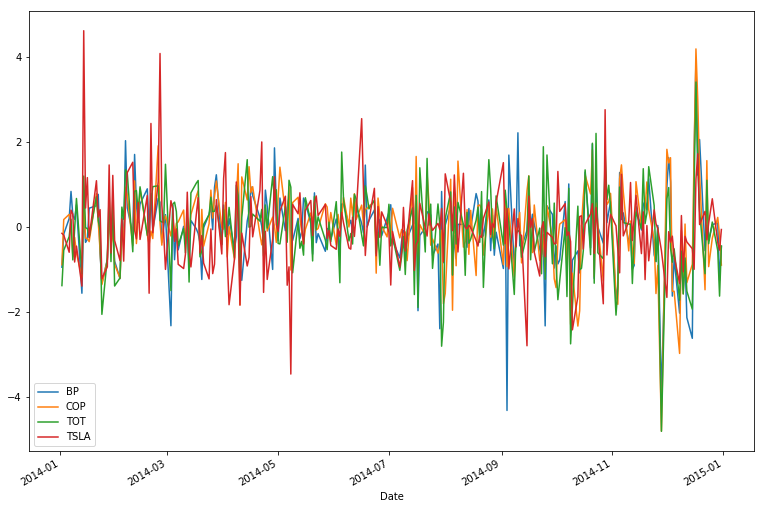

In [56]:
# Normlalize the returns and plot 
## Your code goes here
norm_returns = (pct_change - pct_change.mean(axis=0))/pct_change.std(axis=0)
norm_returns['2014-01-01':'2015-01-01'].plot();

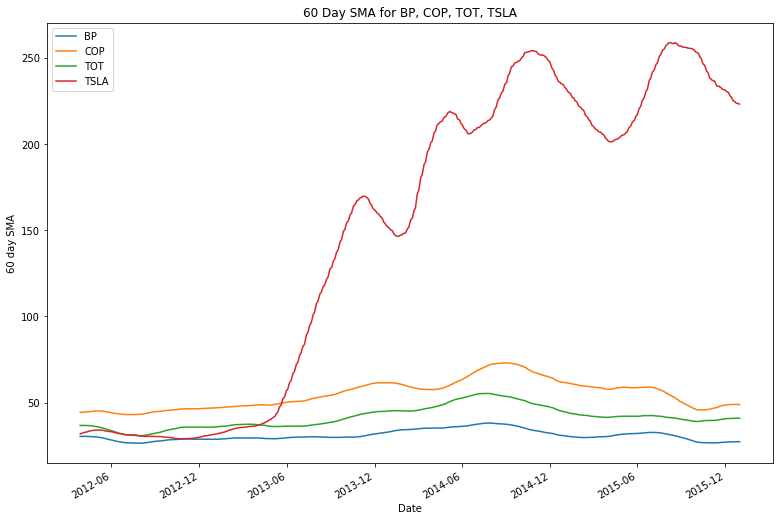

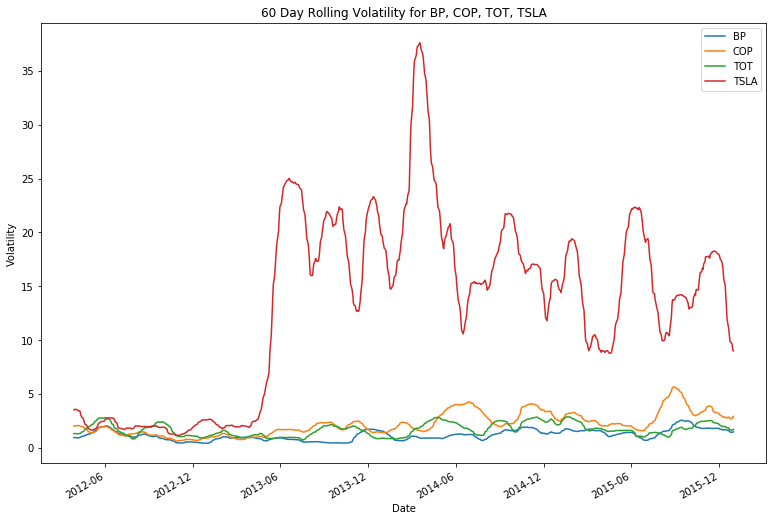

In [59]:
# Rolling mean
## Your code goes here
rolling_mean = prices.rolling(60).mean()
rolling_mean.plot()
plt.title("60 Day SMA for BP, COP, TOT, TSLA")
plt.xlabel("Date")
plt.ylabel("60 day SMA")
plt.legend(['BP', 'COP', 'TOT', 'TSLA']);

# Rolling standard deviation
## Your code goes here
rolling_std = prices.rolling(60).std()
rolling_std.plot()
plt.title("60 Day Rolling Volatility for BP, COP, TOT, TSLA")
plt.xlabel("Date")
plt.ylabel("Volatility")
plt.legend(['BP', 'COP', 'TOT', 'TSLA']);

---

Congratulations on completing the Introduction to pandas exercises!

As you learn more about writing trading algorithms and the Quantopian platform, be sure to check out the daily [Quantopian Contest](https://www.quantopian.com/contest), in which you can compete for a cash prize every day.

Start by going through the [Writing a Contest Algorithm](https://www.quantopian.com/tutorials/contest) Tutorial.

*This presentation is for informational purposes only and does not constitute an offer to sell, a solicitation to buy, or a recommendation for any security; nor does it constitute an offer to provide investment advisory or other services by Quantopian, Inc. ("Quantopian"). Nothing contained herein constitutes investment advice or offers any opinion with respect to the suitability of any security, and any views expressed herein should not be taken as advice to buy, sell, or hold any security or as an endorsement of any security or company.  In preparing the information contained herein, Quantopian, Inc. has not taken into account the investment needs, objectives, and financial circumstances of any particular investor. Any views expressed and data illustrated herein were prepared based upon information, believed to be reliable, available to Quantopian, Inc. at the time of publication. Quantopian makes no guarantees as to their accuracy or completeness. All information is subject to change and may quickly become unreliable for various reasons, including changes in market conditions or economic circumstances.*